In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv("Employee.csv")

In [4]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [5]:
df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [9]:
df.isna().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [11]:
df.duplicated().sum()

1889

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.groupby("Education")["Age"].mean()

Education
Bachelors    31.306443
Masters      30.149137
PHD          29.769231
Name: Age, dtype: float64

In [15]:
df.groupby("Gender")["Age"].mean()

Gender
Female    30.737652
Male      31.126880
Name: Age, dtype: float64

In [17]:
df.sort_values(by="JoiningYear", ascending=False, inplace=True)

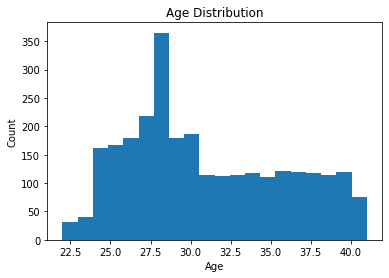

In [19]:
plt.hist(df["Age"], bins=20)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution")
plt.show()

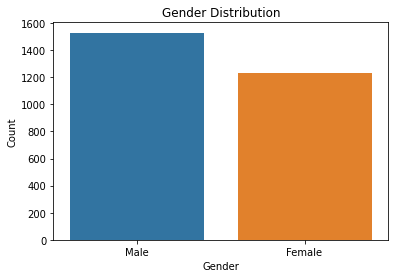

In [20]:
sns.countplot(data=df, x="Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Gender Distribution")
plt.show()

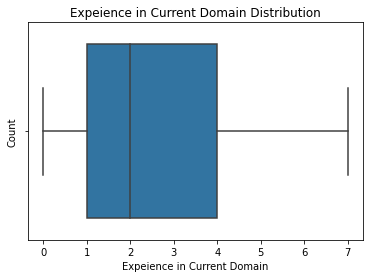

In [21]:
sns.boxplot(data=df, x="ExperienceInCurrentDomain")
plt.xlabel("Expeience in Current Domain")
plt.ylabel("Count")
plt.title("Expeience in Current Domain Distribution")
plt.show()


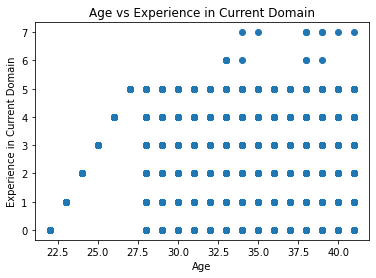

In [22]:
plt.scatter(df["Age"], df["ExperienceInCurrentDomain"])
plt.xlabel("Age")
plt.ylabel("Experience in Current Domain")
plt.title("Age vs Experience in Current Domain")
plt.show()